<a href="https://colab.research.google.com/github/Hari-Soorya/G_C/blob/main/Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/car_evaluation.csv',header=None)   
df                                              

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
# giving column names
df.columns=['buying','maint','doors','persons','lug_boot','safety','class']          
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


**EDA**  

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
# label encoders (for pre-processing)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
col_name=['buying','maint','doors','persons','lug_boot','safety','class']
for i in col_name:                            
  df[i]=encoder.fit_transform(df[i])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [ ]:
X=df.iloc[:,:-1].values
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [ ]:
Y=df.iloc[:,-1].values
Y

array([2, 2, 2, ..., 2, 1, 3])

In [ ]:
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
x_train

array([[1, 0, 3, 1, 1, 1],
       [0, 1, 3, 1, 1, 0],
       [0, 3, 0, 1, 2, 0],
       ...,
       [2, 2, 0, 1, 0, 2],
       [3, 2, 0, 2, 2, 2],
       [2, 0, 3, 0, 0, 0]])

In [ ]:
x_test

array([[2, 1, 1, 2, 2, 1],
       [0, 0, 1, 2, 0, 2],
       [0, 0, 3, 0, 1, 2],
       ...,
       [2, 0, 2, 0, 0, 1],
       [0, 3, 2, 0, 1, 0],
       [3, 1, 3, 1, 0, 0]])

In [ ]:
y_train

array([2, 0, 2, ..., 0, 2, 2])

In [ ]:
y_test

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

# Critirion => Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(x_train,y_train)
y_pre_entropy=dec.predict(x_test)
y_pre_entropy

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
print('Accuracy Score of test data',accuracy_score(y_test,y_pre_entropy))


Accuracy Score of test data 0.9710982658959537


In [ ]:
y_train_pre=dec.predict(x_train)          # predicting values of x-train
print('Accuracy score of trained data',accuracy_score(y_train,y_train_pre))

Accuracy score of trained data 1.0


Accuracy Score of trained and test data is almost similar => it is not over-fit or under-fit

In [ ]:
print(classification_report(y_test,y_pre_entropy))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       111
           1       0.90      0.86      0.88        22
           2       0.99      0.98      0.99       368
           3       1.00      1.00      1.00        18

    accuracy                           0.97       519
   macro avg       0.96      0.95      0.95       519
weighted avg       0.97      0.97      0.97       519



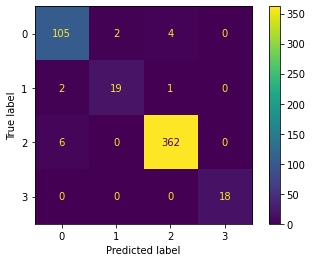

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_entropy))

# Critirion => Gini

In [ ]:
dec_g=DecisionTreeClassifier()
dec_g.fit(x_train,y_train)
y_pre_gini=dec_g.predict(x_test)
y_pre_gini

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 3, 0, 0, 0, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

In [ ]:
print('Accuracy score of test data',accuracy_score(y_test,y_pre_gini))

Accuracy score of test data 0.9691714836223507


# using KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
y_pre_knn=kn.predict(x_test)
y_pre_knn

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       111
           1       0.81      0.59      0.68        22
           2       0.94      0.99      0.96       368
           3       1.00      0.67      0.80        18

    accuracy                           0.92       519
   macro avg       0.90      0.76      0.82       519
weighted avg       0.91      0.92      0.91       519



In [ ]:
print('Accuracy score of test dataset using KNN is ',accuracy_score(y_test,y_pre_knn))

Accuracy score of test dataset using KNN is  0.9171483622350675


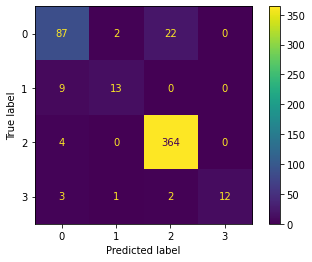

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_knn))

# Using Naive Bayes algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mu=MultinomialNB()
mu.fit(x_train,y_train)
y_pre_nav=mu.predict(x_test)
y_pre_nav

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

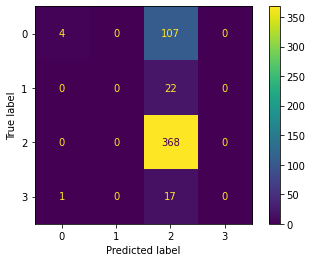

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_nav))

In [ ]:
print('Accuracy score using Naive Bayes is ',accuracy_score(y_test,y_pre_nav))

Accuracy score using Naive Bayes is  0.7167630057803468


In [ ]:
print(classification_report(y_test,y_pre_nav))

              precision    recall  f1-score   support

           0       0.80      0.04      0.07       111
           1       0.00      0.00      0.00        22
           2       0.72      1.00      0.83       368
           3       0.00      0.00      0.00        18

    accuracy                           0.72       519
   macro avg       0.38      0.26      0.23       519
weighted avg       0.68      0.72      0.61       519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# using SVM algorithm

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pre_suvm=sv.predict(x_test)
y_pre_suvm

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

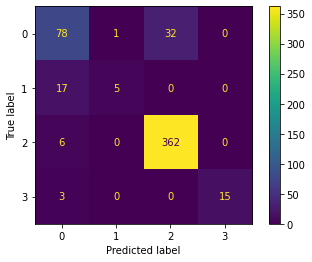

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre_suvm))

In [ ]:
print(classification_report(y_test,y_pre_suvm))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       111
           1       0.83      0.23      0.36        22
           2       0.92      0.98      0.95       368
           3       1.00      0.83      0.91        18

    accuracy                           0.89       519
   macro avg       0.88      0.69      0.74       519
weighted avg       0.88      0.89      0.88       519



In [ ]:
print('Accuracy score obtained by SVM method is ',accuracy_score(y_test,y_pre_suvm))

Accuracy score obtained by SVM method is  0.8863198458574181


# **Result**

The Accuracy score obtained for the trained data is 1.

The Accuracy score obtained for the test data by various methods are listed below
*   Decision Tree (entropy)      => 0.9710 
*   Decision Tree (gini)         => 0.9691
*   KNN algorithm                => 0.9171
*   Naive Bayes algorithm        => 0.7167
*   SVM algorithm                => 0.8863

From all the above accuracy score values, we can conclude that Decision tree algorithm with entropy is better for this dataset





